In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [9]:
with open('../data/processed/5/imu_relative_t_5.pkl', 'rb') as f:
    session_5_eating = pkl.load(f)

with open('../data/processed/5/5.pkl', 'rb') as f:
    session_5_all = pkl.load(f)

In [59]:
with open('../data/processed/5/imu_bite_windows_5.pkl', 'rb') as f:
    session_5_bites = pkl.load(f)

In [70]:
def plot_imu_data(data, bite_index, data_type="acc", thickness=1.5):
    """
    Plots IMU data (accelerometer or gyroscope) for a specified bite index with customizable thickness and style.
    
    Parameters:
        data (list of np.ndarray): The dataset, a list of N*7 NumPy arrays.
        bite_index (int): The index of the desired bite to plot (0-based indexing).
        data_type (str): Type of data to plot. Either 'acc' (accelerometer) or 'gyro' (gyroscope).
        thickness (float): Line thickness for the plot.
        
    Modifications:
        - To change colors, update the color arguments in plt.plot() calls.
        - To alter background or style, modify the plt.figure() parameters.
        - To add axes or labels, remove plt.axis('off') and add appropriate plt.xlabel(), plt.ylabel(), etc.
    """
    # if bite_index >= len(data) or bite_index < 0:
    #     raise ValueError(f"Invalid bite_index. Must be between 0 and {len(data) - 1}.")
    
    sample_array = data[bite_index]
    time = sample_array[:, 0]

    if data_type == "acc":
        signal_x, signal_y, signal_z = sample_array[:, 1], sample_array[:, 2], sample_array[:, 3]
    elif data_type == "gyro":
        signal_x, signal_y, signal_z = sample_array[:, 4], sample_array[:, 5], sample_array[:, 6]
    else:
        raise ValueError("Invalid data_type. Choose 'acc' or 'gyro'.")

    plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent background
    plt.plot(time, signal_x, color='blue', alpha=0.7, linewidth=thickness)
    plt.plot(time, signal_y, color='red', alpha=0.7, linewidth=thickness)
    plt.plot(time, signal_z, color='green', alpha=0.7, linewidth=thickness)
    plt.axis('off')  # Remove axes and labels
    plt.savefig(f'pipeline_transparent_signals/{data_type}_signal_bite_7', dpi=600)
    plt.show()

In [56]:
def plot_continuous_imu_data(data, data_type="acc", thickness=0.8):
    """
    Plots continuous IMU data (accelerometer or gyroscope) with customizable thickness and style.
    
    Parameters:
        data (np.ndarray): The dataset, a single N*7 NumPy array.
        data_type (str): Type of data to plot. Either 'acc' (accelerometer) or 'gyro' (gyroscope).
        thickness (float): Line thickness for the plot.
        
    Modifications:
        - To change colors, update the color arguments in plt.plot() calls.
        - To alter background or style, modify the plt.figure() parameters.
        - To add axes or labels, remove plt.axis('off') and add appropriate plt.xlabel(), plt.ylabel(), etc.
    """
    # if not isinstance(data, np.ndarray) or data.shape[1] != 7:
    #     raise ValueError("Invalid data format. Must be a NumPy array with shape (N, 7).")
    
    # time = data[:, 0]

    # if data_type == "acc":
    signal_x, signal_y, signal_z = data[:, 0], data[:, 1], data[:, 2]
    # elif data_type == "gyro":
    #     signal_x, signal_y, signal_z = data[:, 4], data[:, 5], data[:, 6]
    # else:
    #     raise ValueError("Invalid data_type. Choose 'acc' or 'gyro'.")

    plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent background
    plt.plot(signal_x, color='blue', alpha=0.7, linewidth=thickness)
    plt.plot(signal_y, color='red', alpha=0.7, linewidth=thickness)
    plt.plot(signal_z, color='green', alpha=0.7, linewidth=thickness)
    plt.axis('off')  # Remove axes and labels
    
    plt.savefig(f'pipeline_transparent_signals/{data_type}_signal', dpi=600)
    plt.show()

In [13]:
session_5_all.shape

(254317, 7)

In [22]:
import os
import pandas as pd
def read_sensor_data(path, sensor_type):
    files = [f for f in os.listdir(path) if f.endswith('.bin') and sensor_type in f]
    files = sorted(files, key=lambda x: int(x.split("_")[0]))
    BEtype = np.dtype([
        ("x", ">f"),
        ("y", ">f"),
        ("z", ">f"),
        ("time", ">i8"),
    ])
    all_data = []
    for file in files:
        boot_time_nanos = int(file.split("_")[0]) * 1e6        
        file_path = os.path.join(path, file)
        data = np.fromfile(file_path, dtype=BEtype)
        first_event_time = data['time'][0]
        corrected_timestamps = ((data['time'] - first_event_time) + boot_time_nanos) / 1e9
        corrected_datetimes = pd.to_datetime(corrected_timestamps, unit='s')
        df = pd.DataFrame(data[["x", "y", "z"]].byteswap().newbyteorder())
        df['time'] = corrected_datetimes
#         df['time'] = corrected_datetimes + pd.Timedelta(hours=2) # To UTC + 2

        df = df.set_index('time')
        all_data.append(df)
    return pd.concat(all_data), corrected_datetimes[-1]

In [23]:
subject_id = '5'
path = f'/Users/yiannislevy/Documents/repos/Thesis/Dataset/raw/{subject_id}'

In [38]:
acc_sensor_data, lastTimestamp = read_sensor_data(path, 'accelerometer')

In [39]:
gyro_sensor_data, _ = read_sensor_data(path, 'gyroscope')

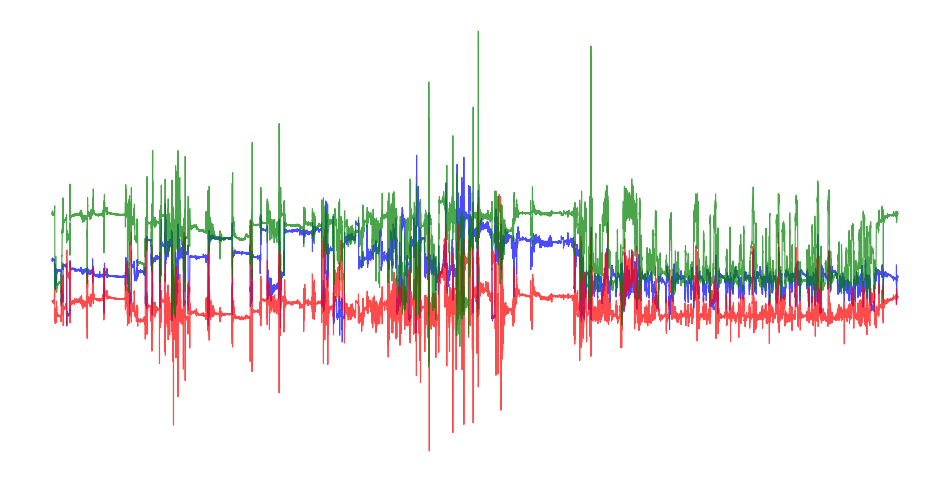

In [53]:
plot_continuous_imu_data(np.array(acc_sensor_data))

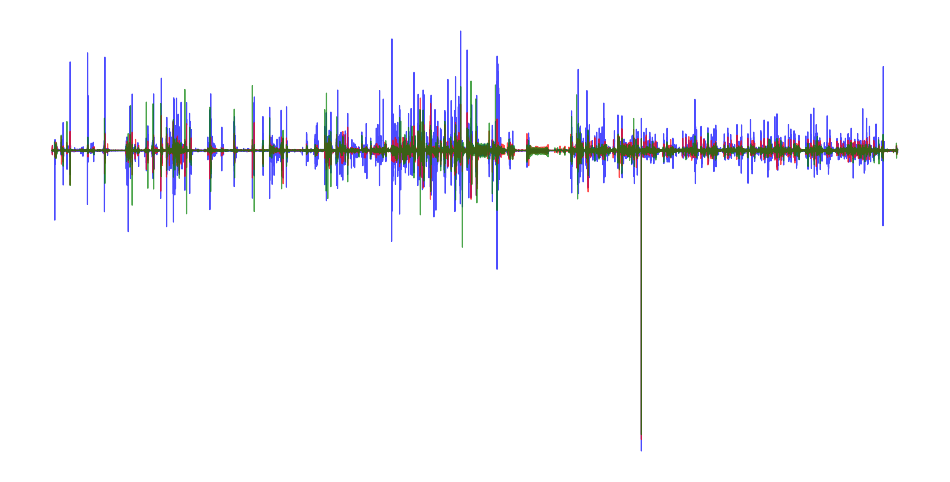

In [57]:
plot_continuous_imu_data(np.array(gyro_sensor_data), 'gyro')

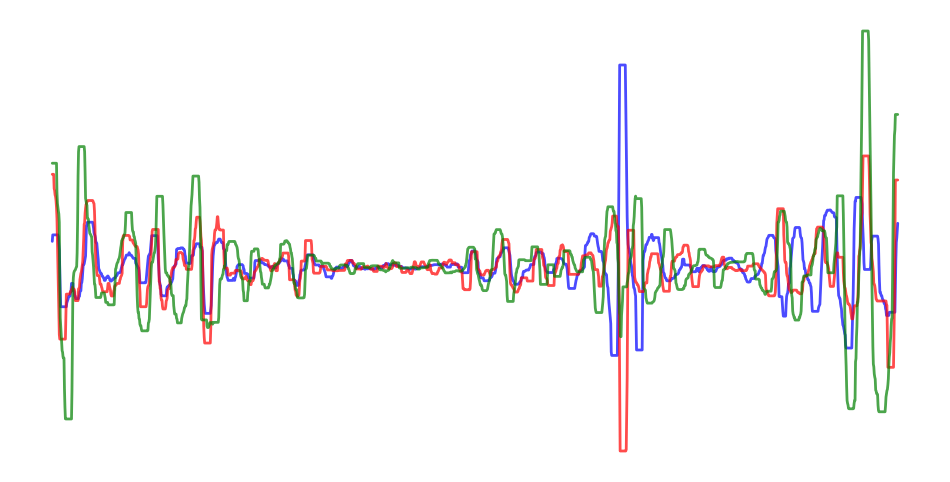

In [71]:
plot_imu_data(session_5_bites, 7, 'acc', 2)

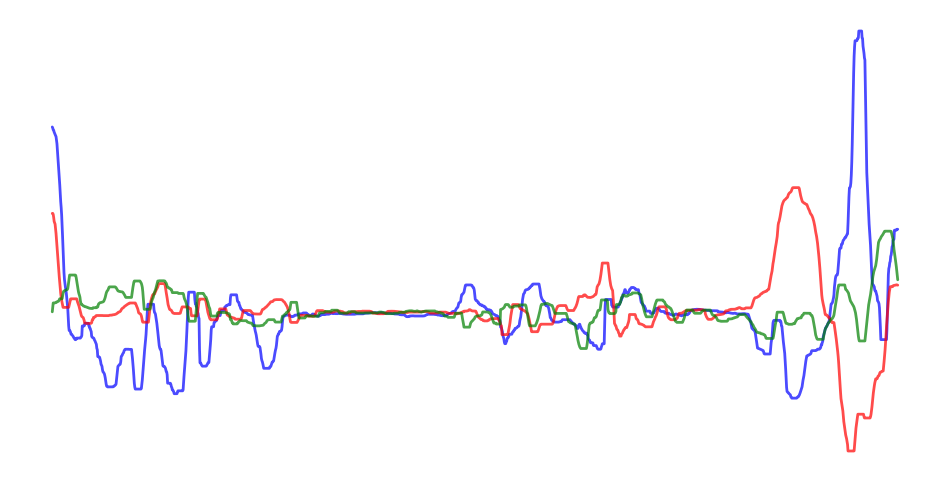

In [72]:
plot_imu_data(session_5_bites, 7, 'gyro', 2)